In [2]:
import requests
import time, os
import json
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns

### Get data

In [6]:
laptops = pd.read_excel("./products/clean/laptops.xlsx",sheet_name="Data Analyst Laptops")
seller = pd.read_excel("./products/clean/laptops.xlsx",sheet_name="Data Analyst Sellers")

### Max Price

In [58]:
table_1 = laptops.sort_values("Max - Price",ascending=False).head(10)
table_1[["Laptops","Max - Price"]]

,Laptops,Max - Price
2,APPLE,6639
0,ACER,6442
14,LENOVO,5589
17,MSI,4359
10,HP,3717
3,ASUS,3706
6,DELL,3159
1,ALIENWARE,1849
19,PANASONIC,1267
11,HUAWEI,1259


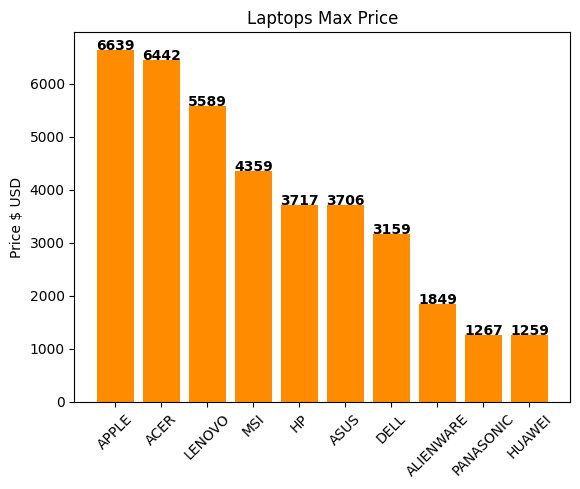

In [53]:
# Data
y = table_1["Laptops"]
x = table_1["Max - Price"]

fig, ax = plt.subplots()

for i, total in enumerate(x):
  ax.text(i, total, round(total),
          ha = 'center', weight = 'bold', color = 'black')

ax.bar(y,x,color="#FF8C00")
plt.ylabel('Price $ USD')
plt.title('Laptops Max Price')
plt.xticks(rotation=45)
plt.show()

### Total Functional or Faluty laptops

In [59]:
table_2 = laptops.sort_values("Count",ascending=False).head(10)
table_2[["Laptops","OPERATIVA","DAÑADA"]]

,Laptops,OPERATIVA,DAÑADA
14,LENOVO,426,17
10,HP,340,42
6,DELL,294,14
3,ASUS,175,7
0,ACER,136,14
2,APPLE,131,5
17,MSI,59,2
23,TOSHIBA,19,24
5,COMPAQ,11,12
21,SIRAGON,9,11


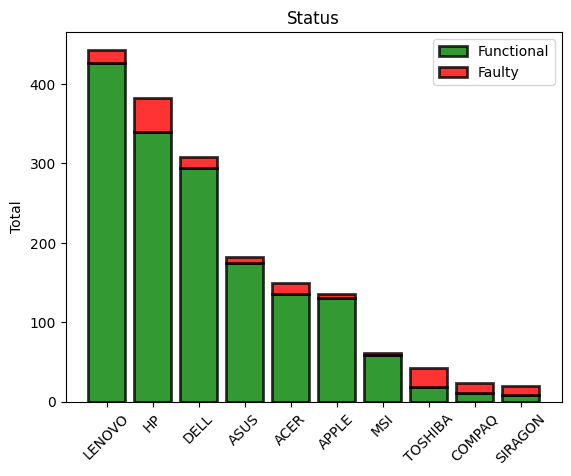

In [38]:
# Data
groups = table_2["Laptops"]
bar_green = table_2["OPERATIVA"]
bar_red = table_2["DAÑADA"]

fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(groups, bar_green, color = "green",
       edgecolor = "black", linewidth = 2, label="Functional",alpha = 0.8)
ax.bar(groups, bar_red, bottom = bar_green, color = "red",
       edgecolor = "black", linewidth = 2, label="Faulty",alpha = 0.8)
ax.legend()

plt.ylabel('Total') # no xlabel required as I feel it's self explanatory
plt.title('Status')
plt.xticks(rotation=45)
plt.show()


### Top Best Sellers

In [60]:
tabla_3 = seller.sort_values('Sales',ascending=False).head(10)
tabla_3[["Seller","Sales"]]

,Seller,Sales
0,BAGCOMPUTER,99
1,SRS SOLUCIONES 360,91
2,TECHNO REFURBISHED,60
3,LDC STORE,4
4,LEBOMAR,3
5,DROITEC,3
6,OPENBOX BY CRT,2
7,CRTECNOLOGICAS,2
8,SUMEMORIA,2
9,TECNOLOGIA CERTIFICADO,1


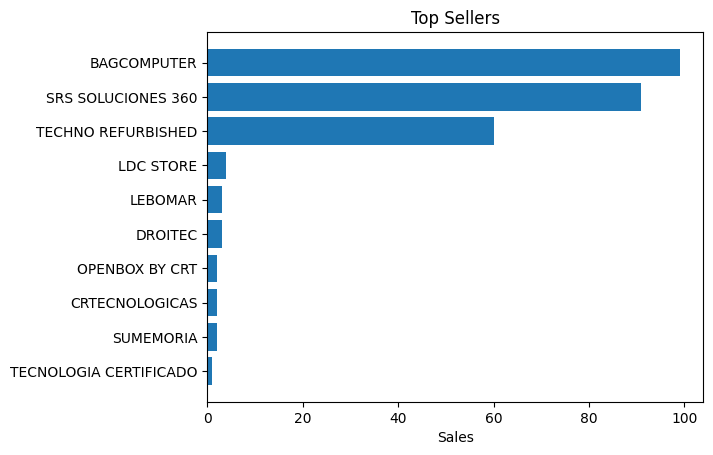

In [26]:
# Data
x = tabla_3["Seller"]
y = tabla_3["Sales"]

# Bar plot
fig, ax = plt.subplots()
ax.barh(x, width = y)
ax.invert_yaxis()
plt.xlabel('Sales')
plt.title('Top Sellers')
plt.show()

### Top 3 best Sellers

In [7]:
tabla_4 = seller.sort_values('Sales',ascending=False).head(3)
tabla_4[["Seller","Sales"]]
total = tabla_4["Sales"].sum()
sales = tabla_4["Sales"]
seller = tabla_4["Seller"]
percent = []

for x in sales:
    percent.append(f"{(x / total) * 100}%")

pd.DataFrame({
    "Seller": seller,
    "Sales": sales,
    "Percent": percent
})


,Seller,Sales,Percent
0,BAGCOMPUTER,99,39.6%
1,SRS SOLUCIONES 360,91,36.4%
2,TECHNO REFURBISHED,60,24.0%


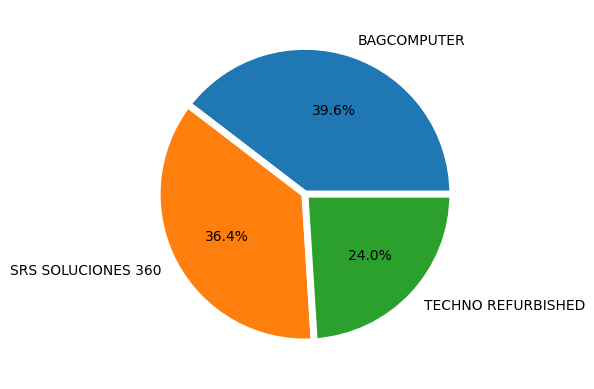

In [55]:
# Data
x = tabla_4["Seller"]
y = tabla_4["Sales"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct = '%1.1f%%', wedgeprops = {"linewidth": 5, "edgecolor": "white"})
plt.show()